# MACHINE LEARNING

# 5/4/25

[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
3


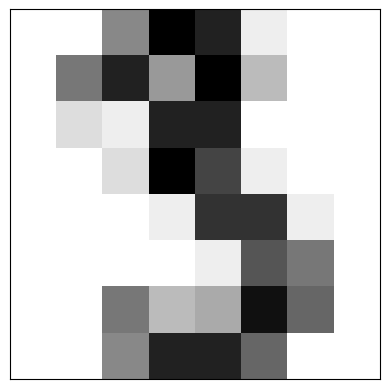

In [26]:
from sklearn.datasets import load_digits
dig = load_digits()
# print(dig)
# print(len(dig)) # 7

# for i in dig:
#     print(i)

# print(dig.DESCR)

# print(dig.target[::100])

# print(dig.data.shape)

print(dig.images[3])
print(dig.target[3])

# print(dig.data[3])

# import matplotlib .pyplot as plt
# figure, axes = plt.subplots(nrows=4, ncols=6, figsize = (6,4))
# # plt.show()
# for item in zip(axes.ravel(), dig.images, dig.target):
#     axes, image, target = item
#     # axes.imshow(image, cmap = plt.cm.gray_r)
#     axes.imshow(image)
#     axes.set_xticks([])
#     axes.set_yticks([])
#     axes.set_title(target)
# plt.tight_layout()
# plt.show()

axes = plt.subplot()
image = plt.imshow(dig.images[3], cmap = plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])
plt.show()

_______
# Train and Test

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, random_state = 11)
# X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, random_state = 11, test_size = 0.2) # 80% of 1737 = 1437

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X = X_train, y = y_train)
predicted = knn.predict(X = X_test)
expected = y_test

# print(predicted)
# print()
# print(expected)

# wrong = [(p,e) for (p,e) in zip(predicted, expected) if p!=e]
# print(wrong)
# print(len(wrong))

# print(f'{knn.score(X_test, y_test):.2%}')

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
print(confusion)


[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]


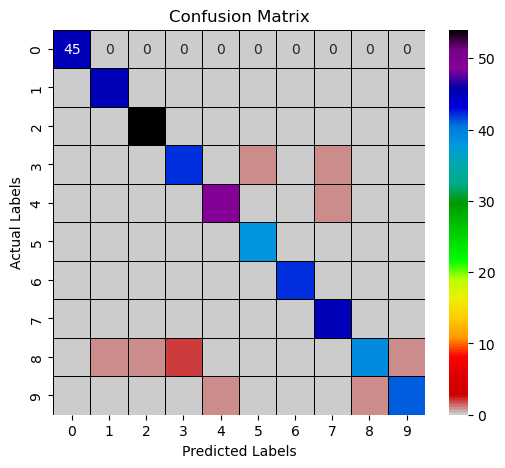

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
plt.figure(figsize = (6,5))
sns.heatmap(confusion, annot = True, fmt = 'd', cmap = 'nipy_spectral_r', linewidth = 0.5, linecolor = 'black')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report
names = [str(digit) for digit in dig.target_names]
print(classification_report(expected, predicted, target_names = names))